In [2]:
!pip install lifelines
!pip install tqdm
from tqdm import tqdm
import numpy as np

In [3]:
import pandas as pd
hospit_non_chr=pd.read_csv("base_hospit_non_chr_anonyme.csv")
hospit_full_hospit=pd.read_csv("base_full_hospit_anonyme.csv")
consommant=pd.read_csv("consommant_anonyme.csv")
patient=pd.read_csv("patient_anonyme.csv")

/tmp/ipykernel_519/1509498775.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  hospit_non_chr=pd.read_csv("base_hospit_non_chr_anonyme.csv")
/tmp/ipykernel_519/1509498775.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  hospit_full_hospit=pd.read_csv("base_full_hospit_anonyme.csv")


In [4]:
hospit_non_chr

,RSA_NUM,ETA_NUM,EXE_SOI_DTD,SEJ_NBJ,GRG_GHM,DGN_PAL,DGN_REL,BEN_NIR_IDT,CHOC,HEMOD,CHIMIO,Radiotherapie
0,144689,310781406,2011-11-22,2.0,05K051,I2100,NaN,P0,0,0,0,0
1,2763,110780061,2011-11-24,8.0,05M042,I21000,NaN,P0,0,0,0,0
2,15548,110780061,2011-12-08,0.0,05M16T,I255,NaN,P0,0,0,0,0
3,5260,110780061,2012-03-04,1.0,05M09T,I501,NaN,P0,0,0,0,0
4,112258,310781406,2012-03-05,7.0,05M092,I501,NaN,P0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
87880,16969,130784713,2013-02-21,30.0,04M174,J91,NaN,P24308,0,0,0,0
87881,15396,810000331,2010-12-18,17.0,08C322,S8221,NaN,P24310,0,0,0,0
87882,4738,810000331,2011-01-07,0.0,08C14J,Z470,NaN,P24310,0,0,0,0
87883,14458,810000331,2011-01-26,7.0,08C322,S8221,NaN,P24310,0,0,0,0


In [5]:
patient

,date_h0,ALD_before,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT
0,2011-11-22,0,1949,11,1,NaN,P0
1,2013-12-05,0,1929,14,2,2015-03,P6
2,2015-07-02,0,1967,54,2,2015-08,P8
3,2011-05-19,0,1959,974,1,NaN,P13
4,2010-03-18,0,1947,76,1,NaN,P16
...,...,...,...,...,...,...,...
10047,2014-02-08,0,1920,29,1,2014-12,P24302
10048,2012-02-09,0,1927,61,1,2017-05,P24303
10049,2010-07-27,0,1924,999,1,2010-08,P24304
10050,2011-11-25,0,1925,13,2,2013-03,P24308


In [6]:
patient["date_h0"]=pd.to_datetime(patient["date_h0"])
patient["dte_deces"]=pd.to_datetime(patient["dte_deces"])

In [7]:
patient

,date_h0,ALD_before,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT
0,2011-11-22,0,1949,11,1,NaT,P0
1,2013-12-05,0,1929,14,2,2015-03-01,P6
2,2015-07-02,0,1967,54,2,2015-08-01,P8
3,2011-05-19,0,1959,974,1,NaT,P13
4,2010-03-18,0,1947,76,1,NaT,P16
...,...,...,...,...,...,...,...
10047,2014-02-08,0,1920,29,1,2014-12-01,P24302
10048,2012-02-09,0,1927,61,1,2017-05-01,P24303
10049,2010-07-27,0,1924,999,1,2010-08-01,P24304
10050,2011-11-25,0,1925,13,2,2013-03-01,P24308


In [8]:
patient["Nb_survie"]=patient["dte_deces"]-patient["date_h0"]
patient["Mort"]= [x.days>0 for x in patient["Nb_survie"]]
#patient=patient.drop(columns=["Survie"])

In [9]:
patient

,date_h0,ALD_before,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT,Nb_survie,Mort
0,2011-11-22,0,1949,11,1,NaT,P0,NaT,False
1,2013-12-05,0,1929,14,2,2015-03-01,P6,451 days,True
2,2015-07-02,0,1967,54,2,2015-08-01,P8,30 days,True
3,2011-05-19,0,1959,974,1,NaT,P13,NaT,False
4,2010-03-18,0,1947,76,1,NaT,P16,NaT,False
...,...,...,...,...,...,...,...,...,...
10047,2014-02-08,0,1920,29,1,2014-12-01,P24302,296 days,True
10048,2012-02-09,0,1927,61,1,2017-05-01,P24303,1908 days,True
10049,2010-07-27,0,1924,999,1,2010-08-01,P24304,5 days,True
10050,2011-11-25,0,1925,13,2,2013-03-01,P24308,462 days,True


In [10]:
for i in tqdm(range(len(patient))):
    if  not pd.isnull(patient['Nb_survie'].iloc[i]):
            pass
    else:
        patient.loc[i,'Nb_survie']=pd.to_datetime('31/12/2018')-patient['date_h0'].iloc[i]
    
    
#patient["Nb_survie"]=patient["dte_deces"].apply(lambda x: patient.Nb_survie if x else pd.to_datetime('31/12/2018')-patient["date_h0"], "d")

  0%|          | 0/10052 [00:00<?, ?it/s]/tmp/ipykernel_519/910496900.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  patient.loc[i,'Nb_survie']=pd.to_datetime('31/12/2018')-patient['date_h0'].iloc[i]
100%|██████████| 10052/10052 [00:01<00:00, 6816.45it/s]


In [11]:
patient


,date_h0,ALD_before,y_nais,BEN_RES_DPT,BEN_SEX_COD,dte_deces,CODE_PATIENT,Nb_survie,Mort
0,2011-11-22,0,1949,11,1,NaT,P0,2596 days,False
1,2013-12-05,0,1929,14,2,2015-03-01,P6,451 days,True
2,2015-07-02,0,1967,54,2,2015-08-01,P8,30 days,True
3,2011-05-19,0,1959,974,1,NaT,P13,2783 days,False
4,2010-03-18,0,1947,76,1,NaT,P16,3210 days,False
...,...,...,...,...,...,...,...,...,...
10047,2014-02-08,0,1920,29,1,2014-12-01,P24302,296 days,True
10048,2012-02-09,0,1927,61,1,2017-05-01,P24303,1908 days,True
10049,2010-07-27,0,1924,999,1,2010-08-01,P24304,5 days,True
10050,2011-11-25,0,1925,13,2,2013-03-01,P24308,462 days,True


In [12]:
patient['Nb_survie']=patient['Nb_survie'].apply(lambda x: x.days)

In [13]:
patient_mort=patient.loc[patient["Mort"]]
hospit_mort = []
hospit_nb_survie=[]
code_patient_mort=np.array(patient_mort.CODE_PATIENT)
for i in tqdm(range(len(hospit_full_hospit.BEN_NIR_IDT))):
    x=hospit_full_hospit.BEN_NIR_IDT.iloc[i]
    hospit_nb_survie.append(patient[patient["CODE_PATIENT"]==x]["Nb_survie"].iloc[0])
    if x in code_patient_mort:
        hospit_mort.append(True)
    else:
        hospit_mort.append(False)
hospit_full_hospit["Mort"]=hospit_mort
hospit_full_hospit["Nb_survie"]=hospit_nb_survie

100%|██████████| 156336/156336 [02:21<00:00, 1103.45it/s]


In [14]:
hospit_full_hospit

,RSA_NUM,ETA_NUM,EXE_SOI_DTD,SEJ_NBJ,GRG_GHM,DGN_PAL,DGN_REL,BEN_NIR_IDT,CHOC,HEMOD,CHIMIO,Radiotherapie,Mort,Nb_survie
0,144689,310781406,2011-11-22,2.0,05K051,I2100,NaN,P0,0,0,0,0,False,2596
1,2763,110780061,2011-11-24,8.0,05M042,I21000,NaN,P0,0,0,0,0,False,2596
2,15548,110780061,2011-12-08,0.0,05M16T,I255,NaN,P0,0,0,0,0,False,2596
3,5260,110780061,2012-03-04,1.0,05M09T,I501,NaN,P0,0,0,0,0,False,2596
4,112258,310781406,2012-03-05,7.0,05M092,I501,NaN,P0,0,0,0,0,False,2596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156331,16969,130784713,2013-02-21,30.0,04M174,J91,NaN,P24308,0,0,0,0,True,462
156332,15396,810000331,2010-12-18,17.0,08C322,S8221,NaN,P24310,0,0,0,0,False,2935
156333,4738,810000331,2011-01-07,0.0,08C14J,Z470,NaN,P24310,0,0,0,0,False,2935
156334,14458,810000331,2011-01-26,7.0,08C322,S8221,NaN,P24310,0,0,0,0,False,2935


In [57]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], duration_col='Nb_survie', event_col='Mort')

cph.print_summary()  # access the individual results using cph.summary


<lifelines.CoxPHFitter: fitted with 156336 total observations, 60920 right-censored observations>
             duration col = 'Nb_survie'
                event col = 'Mort'
      baseline estimation = breslow
   number of observations = 156336
number of events observed = 95416
   partial log-likelihood = -1074104.48
         time fit was run = 2023-01-24 15:47:55 UTC

---
                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                             
CHOC            0.27       1.30       0.06             0.14             0.39                 1.15                 1.48
HEMOD           0.08       1.09       0.01             0.07             0.10                 1.07                 1.10
CHIMIO          0.55       1.74       0.01             0.53             0.58                 1.70                 1.78
Radiotherapie   0.22       1.25       0.02             0.19             0.26                 1.20                 1.29

                cmp to     z      p   -log2(p)
covariate                                     
CHOC              0.00  4.23 <0.005      15.39
HEMOD             0.00 11.97 <0.005     107.23
CHIMIO            0.00 46.26 <0.005        inf
Radiotherapie     0.00 12.34 <0.005     113.82
---
Concordance = 0.52
Partial AIC = 2148216.97
log-likelihood ratio test = 1963.34 on 4 df
-log2(p) of ll-ratio test = inf

<AxesSubplot: >

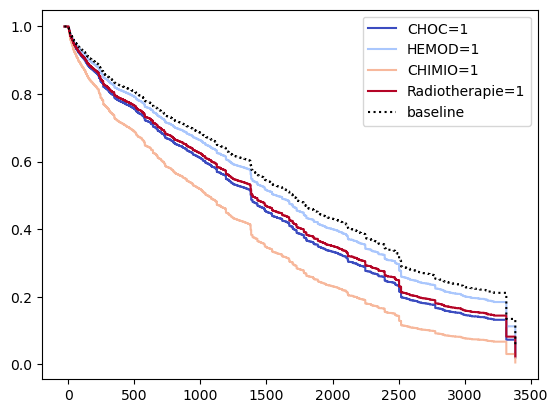

In [58]:
cph.plot_partial_effects_on_outcome(covariates=['CHOC','HEMOD','CHIMIO','Radiotherapie'], values=[(1,0,0,0),(0,1,0,0),(0,0,1,0),(0,0,0,1)], cmap='coolwarm')
# cph.plot_partial_effects_on_outcome(covariates=['HEMOD','CHIMIO','Radiotherapie'], values=[(1,0,0),(0,1,0),(0,0,1)], cmap='coolwarm')

In [59]:
cph.params_

covariate
CHOC             0.266165
HEMOD            0.084727
CHIMIO           0.554182
Radiotherapie    0.220436
Name: coef, dtype: float64

In [60]:
cph.baseline_hazard_

,baseline hazard
-30.0,0.000000
-29.0,0.000000
-28.0,0.000000
-27.0,0.000000
-26.0,0.000000
...,...
3284.0,0.000000
3285.0,0.000000
3286.0,0.000000
3316.0,0.491312


<AxesSubplot: xlabel='log(HR) (95% CI)'>

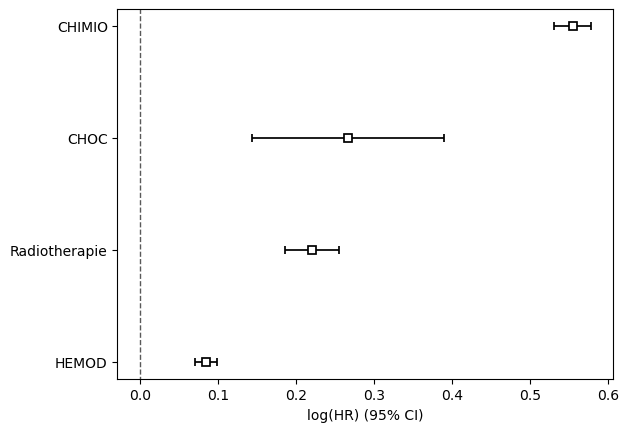

In [61]:
cph.plot()

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 156336 total observations, 60920 right-censored observations>
         test_name = proportional_hazard_test

---
                    test_statistic      p  -log2(p)
CHIMIO        km            106.35 <0.005     80.42
              rank          122.11 <0.005     91.89
CHOC          km             29.91 <0.005     24.40
              rank           34.77 <0.005     28.01
HEMOD         km           5908.84 <0.005       inf
              rank         5824.24 <0.005       inf
Radiotherapie km            336.84 <0.005    247.51
              rank          377.89 <0.005    277.20



1. Variable 'CHOC' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['CHOC', ...]` in the call in
`.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...



KeyboardInterrupt: 

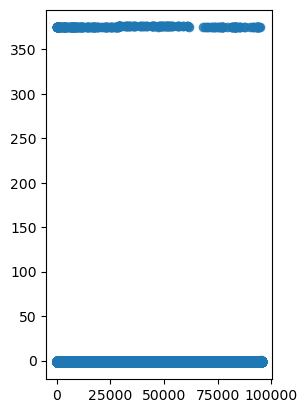

In [63]:
cph.check_assumptions(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], p_value_threshold=0.05, show_plots=True)

In [39]:
#Avec Stratification
cph = CoxPHFitter()
cph.fit(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], duration_col='Nb_survie', event_col='Mort',strata=['CHOC','HEMOD','CHIMIO','Radiotherapie'])

cph.print_summary()  # access the individual results using cph.summary


<lifelines.CoxPHFitter: fitted with 156336 total observations, 60920 right-censored observations>
             duration col = 'Nb_survie'
                event col = 'Mort'
                   strata = ['CHOC', 'HEMOD', 'CHIMIO', 'Radiotherapie']
      baseline estimation = breslow
   number of observations = 156336
number of events observed = 95416
   partial log-likelihood = -973851.03
         time fit was run = 2023-01-24 15:42:06 UTC

---
Empty DataFrame
Columns: [ coef,  exp(coef),  se(coef),  coef lower 95%,  coef upper 95%,  exp(coef) lower 95%,  exp(coef) upper 95%]
Index: []

Empty DataFrame
Columns: [ cmp to,  z,  p,  -log2(p)]
Index: []
---
Concordance = 0.50
Partial AIC = 1947702.05
log-likelihood ratio test = 0.00 on 0 df
-log2(p) of ll-ratio test = nan

<AxesSubplot: xlabel='log(HR) (95% CI)'>

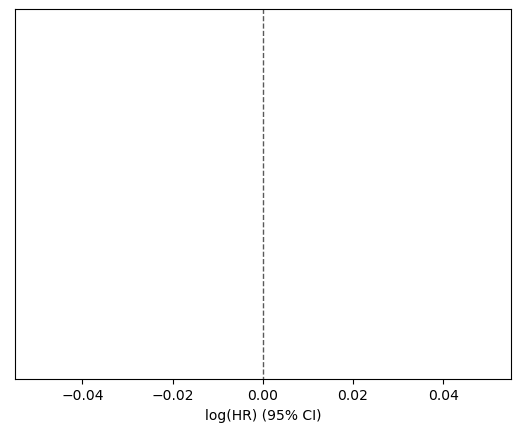

In [54]:
cph.plot()

In [42]:
cph.params_

Series([], Name: coef, dtype: float64)

In [43]:
cph.baseline_hazard_

,"(0, 0, 0, 0)","(0, 0, 0, 1)","(0, 0, 1, 0)","(0, 1, 0, 0)","(1, 0, 0, 0)"
-30.0,0.000000,0.0,0.0,0.0,0.0
-29.0,0.000000,0.0,0.0,0.0,0.0
-28.0,0.000000,0.0,0.0,0.0,0.0
-27.0,0.000000,0.0,0.0,0.0,0.0
-26.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3284.0,0.000000,0.0,0.0,0.0,0.0
3285.0,0.000000,0.0,0.0,0.0,0.0
3286.0,0.000000,0.0,0.0,0.0,0.0
3316.0,0.454545,0.0,0.0,0.0,0.0


In [ ]:
cph.plot()

In [56]:
cph.check_assumptions(hospit_full_hospit[['Nb_survie','Mort','CHOC','HEMOD','CHIMIO','Radiotherapie']], p_value_threshold=0.05, show_plots=True)

Proportional hazard assumption looks okay.


[]